# Stacking circumbinary transits
Goal is to think about what really needs to be known to do some kind of brute force search for circumbinary planets.

The timing of Kerpler 16 transits can be changed by days by changing the primary mass by about 10$^{-4}$, a tiny amount. This simply changes the mean motion of the planet so the transits are systematically off by a fixed amount each orbit. This effect can be corrected by an even smaller change in the binary and planet semi-major axes. To keep the mean motion the same the amount should be $\Delta a^3 = \Delta M_b$. That is, a search in semi-major axis can account for uncertainty in binary mass that simply means the planet arrives too early or too late.

This isn't everything with the mass however, since the binary mass also changes the size of the orbit, which also affects when the transits occur. At fixed period however the semi-major axis is a weak function of the mass, so this effect doesn't appear to be large. It can still be of order days, and the offsets are not strictly fixed per transit, so can't simply be corrected for by a different semi-major axis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import funcs
import copy

%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
d,_,_,_,_,_,f,_ = np.genfromtxt('../k16/12644769.00.lc.data',unpack=True)
d += 2400000.0

In [6]:
# Kepler 16, at 2,455,212.12316
cb = funcs.CBSystem(m1 = 0.6897,f1 = 1.,m2 = 0.20255,f2 = 0.01555,
                    ab = 0.22431,r1 = 0.6489 * u.Rsun.to('au'),r2 = 0.22623 * u.Rsun.to('au'),
                    eb = 0.15944,ib = np.deg2rad(90.3401),wb = np.deg2rad(263.464),
                    fb = np.deg2rad(186.53239),
                    mp = .03e-3,ap = 0.7048,rp = 0.7538 * u.Rjupiter.to('au'),ep = 0.0069,
                    ip = np.deg2rad(90.0322),wp = np.deg2rad(318.0),fp = np.deg2rad(148.92),
                    t0 = 2455212.12316)

In [4]:
# modify orbit by changing things self consistently
dm = 1e-1
dm_tot = (cb.m1*(1+dm) + cb.m2)/(cb.m1+cb.m2)
cb.m1 = cb.m1 * (1+dm)
cb.ab = cb.ab * (dm_tot)**(1/3.)
cb.ap = cb.ap * (dm_tot)**(1/3.)
print(cb.m1,cb.ab,cb.ap)

0.7586700000000001 0.22994680660548067 0.7225112981835085


In [7]:
tts = funcs.reb_cb_c(cb,tmin=np.min(d),tmax=np.max(d))

<IPython.core.display.Javascript object>


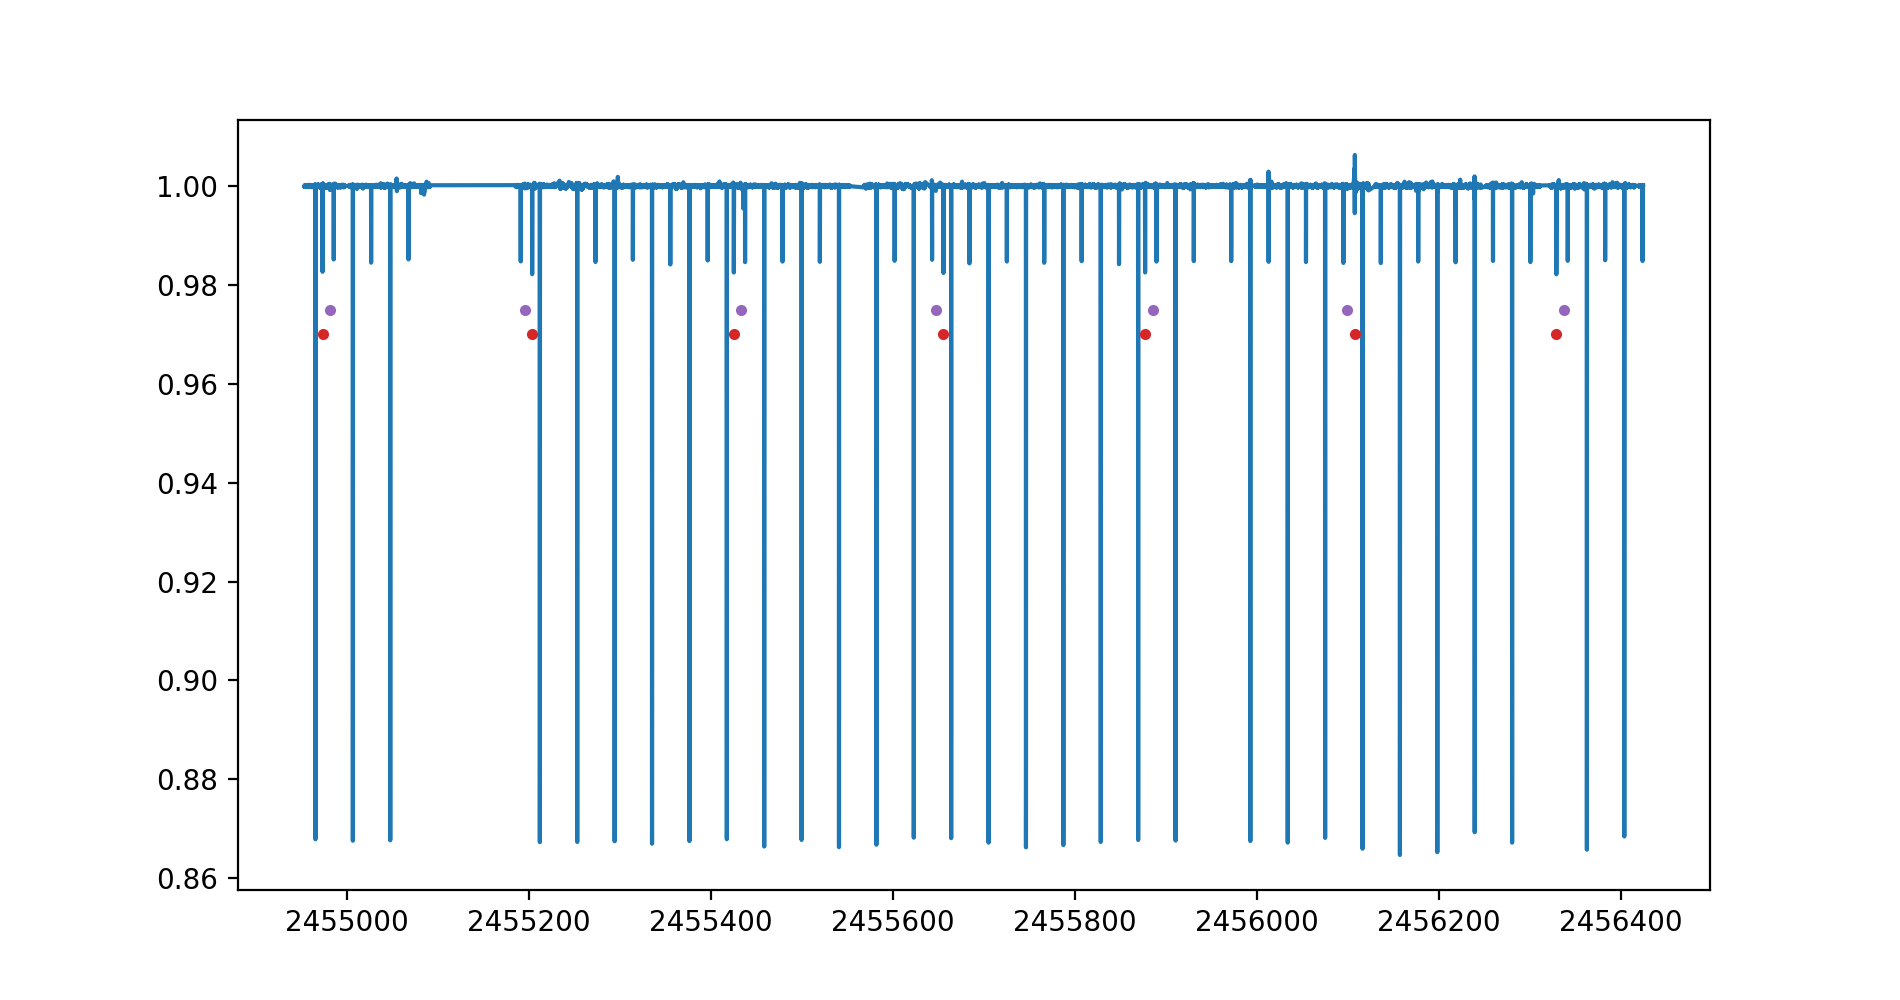

In [8]:
fig,ax = plt.subplots(figsize=(9.5,5))
ax.plot(d,f)
for i,y in zip([1,10,20,21],[0.98,0.98,0.97,0.975]):
    ok = tts[:,0] == i
    ax.plot(tts[ok,1], np.zeros(np.sum(ok))+y, '.')

<IPython.core.display.Javascript object>


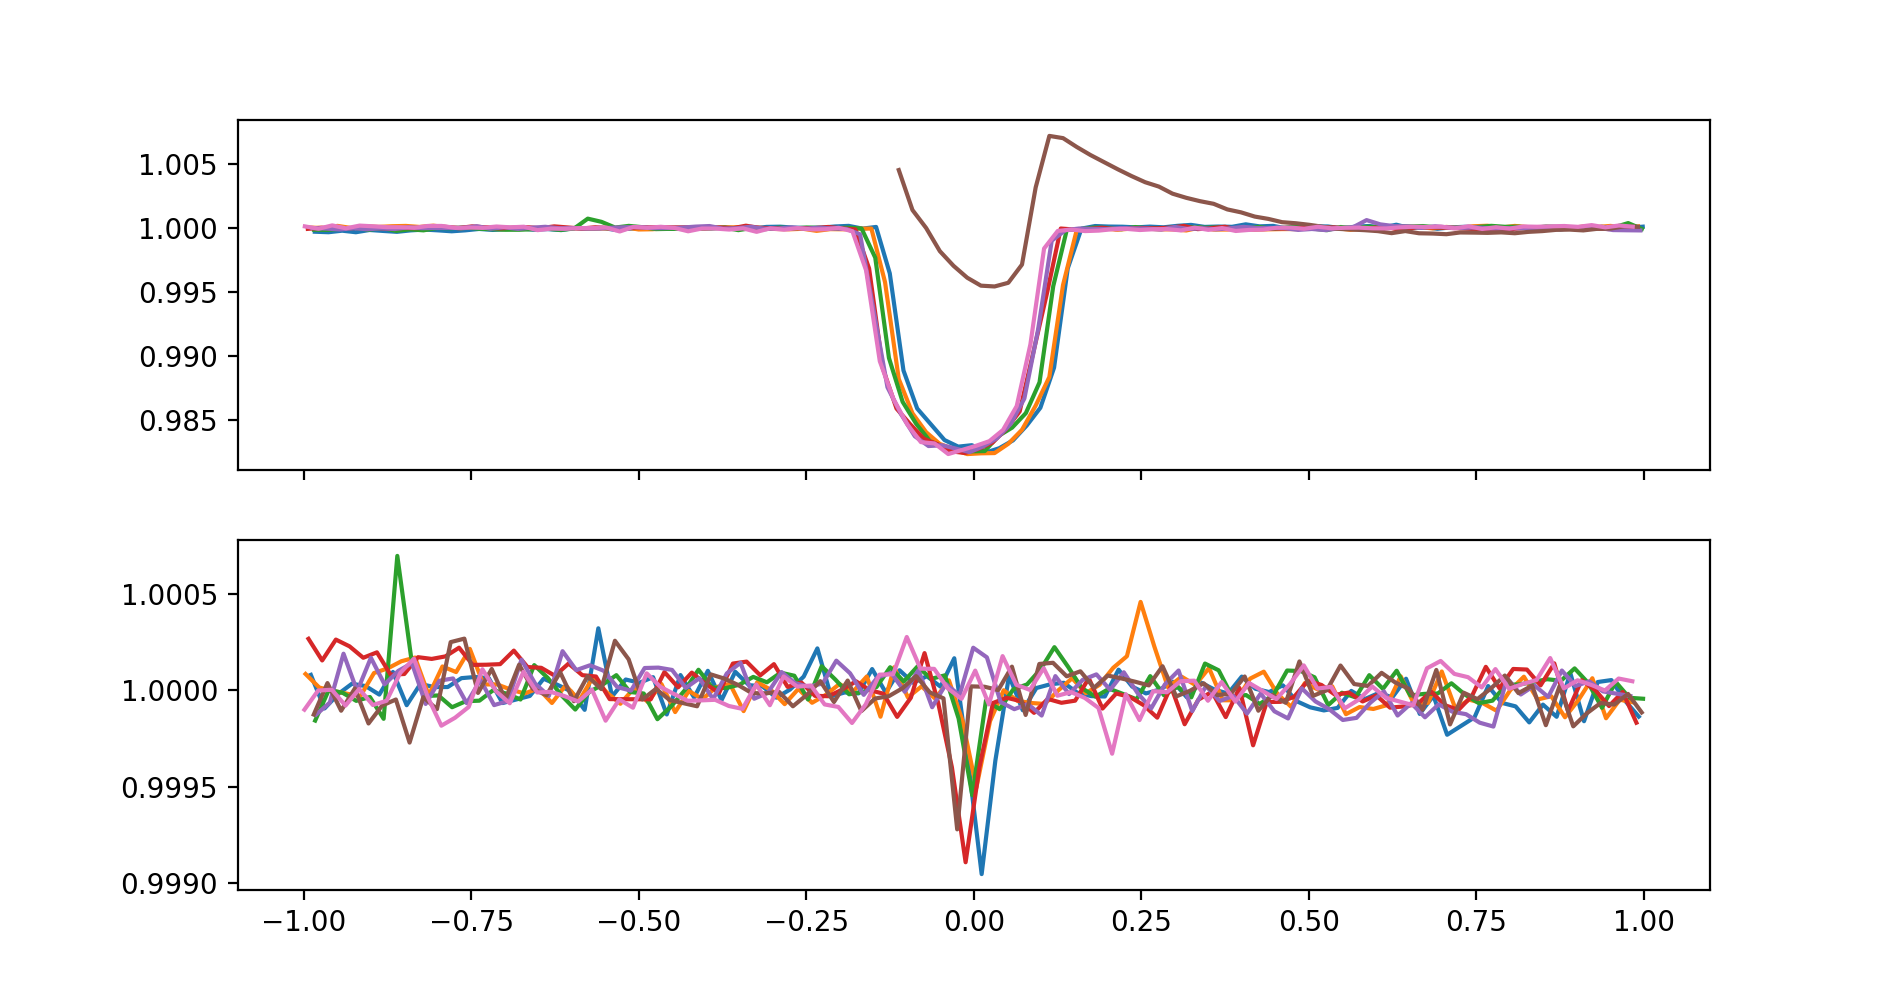

0.982691446126
0.999904748696


In [24]:
fig,ax = plt.subplots(2, figsize=(9.5,5), sharex=True)

times, stack = funcs.stack(d, f, cb)
for t,s in zip(times,stack):
    ax[0].plot(t, s)

print(funcs.stack_metric(times,stack))

times, stack = funcs.stack(d, f, cb, event=21)
for t,s in zip(times,stack):
    ax[1].plot(t, s)

print(funcs.stack_metric(times,stack))

In [37]:
ap = np.arange(0.7,0.71,0.0005)
fpl = np.arange(2.5, 2.7, 0.01)
metric = np.zeros((len(ap), len(fpl)))
cb1 = copy.deepcopy(cb)
for i,a in enumerate(ap):
    for j,fp in enumerate(fpl):
        cb1.ap = a
        cb1.fp = fp
        times, stack = funcs.stack(d, f, cb1, event=20)
        metric[i,j] = funcs.stack_metric(times, stack)

<IPython.core.display.Javascript object>


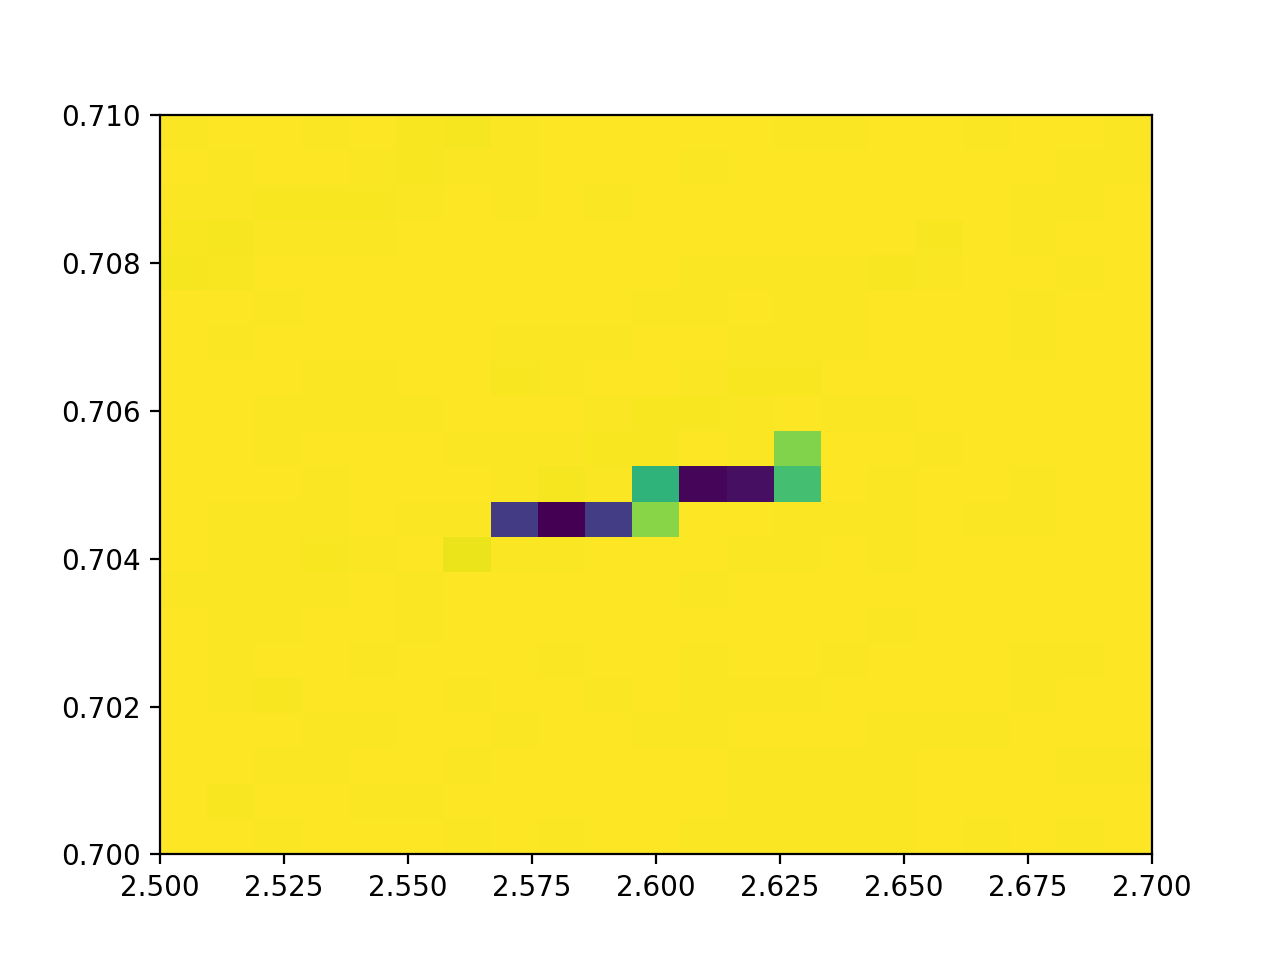

In [38]:
fig, ax = plt.subplots()
ax.imshow(metric, origin='bottom', extent=(fpl[0], fpl[-1], ap[0], ap[-1]), aspect='auto')